In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')


In [2]:

data_path = 'D:/Zomato/zomato.csv'
from pandas import read_csv

In [3]:
df= read_csv(data_path)
print(f'Dataset shape: {df.shape}')
df.head()

Dataset shape: (51717, 17)


url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
df.isnull().sum()


url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [6]:
#Using Normal For Loops
feature_na=[]
for feature in df.columns:
    if df[feature].isnull().sum()>1:
        feature_na.append(feature)
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [7]:
#or other option list comprehension python using Standard Of IT Industries
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>1]
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [8]:
#finding feature is null values
df['rate'].isnull().sum()

7775

In [9]:
#In Percentagewise  Null values counting 
df['rate'].isnull().sum()/len(df)*100

15.033741322969234

In [10]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [11]:
import numpy as np
for feature in feature_na:
    print('{} has {} % missing values'.format(feature,np.round(df[feature].isnull().sum()/len(df)*100,4)))

rate has 15.0337 % missing values
phone has 2.3358 % missing values
location has 0.0406 % missing values
rest_type has 0.4389 % missing values
dish_liked has 54.2916 % missing values
cuisines has 0.087 % missing values
approx_cost(for two people) has 0.669 % missing values


In [12]:
df['approx_cost(for two people)'].dtype

dtype('O')

In [13]:
df['approx_cost(for two people)'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
51712    False
51713    False
51714    False
51715    False
51716    False
Name: approx_cost(for two people), Length: 51717, dtype: bool

In [14]:
#Pass the into our dataframe to check
df[df['approx_cost(for two people)'].isnull()]

url  \
1662   https://www.zomato.com/bangalore/papa-khan-ras...   
1768   https://www.zomato.com/bangalore/innate-jp-nag...   
1795   https://www.zomato.com/bangalore/super-chefs-b...   
3069   https://www.zomato.com/bangalore/super-chefs-b...   
3774   https://www.zomato.com/bangalore/the-hub-ibis-...   
...                                                  ...   
50940  https://www.zomato.com/bangalore/cinnabon-whit...   
51233  https://www.zomato.com/bangalore/mayas-kitchen...   
51247  https://www.zomato.com/bangalore/mast-kalandar...   
51271  https://www.zomato.com/bangalore/karavalli-foo...   
51641  https://www.zomato.com/bangalore/andhra-spices...   

                                                 address  \
1662   6, Abbiah Layout KC Halli Main Road, Bommanaha...   
1768   45, 14th Main, 7th phase, Puttehahalli Palya, ...   
1795   8/3, Opposite Suryadhoya Convention hall, Bann...   
3069   8/3, Opposite Suryadhoya Convention hall, Bann...   
3774   Ibis Bengaluru, Opposite RMZ Ecospace Business...   
...                                                  ...   
50940  Ground Floor, The Forum Neighborhood Mall, Pre...   
51233  43/9, Borewell Rd, Palm Meadows, Nallurhalli, ...   
51247  D64, 33, 1st Floor, Sundari Armadale, Next To ...   
51271  N254-107, 1st Main Road, Near ITPL Gate 3, KIA...   
51641  188, ITPL Main Road, Brookefields, Bangalore, ...   

                                 name online_order book_table    rate  votes  \
1662                  Papa Khan Rasoi           No         No     NaN      0   
1768                           Innate           No         No     NaN      0   
1795   Super Chef's (New Royal treat)           No         No     NaN      0   
3069   Super Chef's (New Royal treat)           No         No       -      0   
3774         The Hub - Ibis Bengaluru           No         No   3.9/5    237   
...                               ...          ...        ...     ...    ...   
50940                        Cinnabon           No         No  4.0 /5     80   
51233                   Mayas kitchen           No         No     NaN      0   
51247                   Mast Kalandar           No         No  2.6 /5     76   
51271            Karavalli Food Court           No         No  3.2 /5      4   
51641                   Andhra Spices           No         No  3.2 /5      4   

      phone           location      rest_type  \
1662    NaN                NaN            NaN   
1768    NaN           JP Nagar       Delivery   
1795    NaN  Bannerghatta Road    Quick Bites   
3069    NaN  Bannerghatta Road    Quick Bites   
3774    NaN       Marathahalli            Bar   
...     ...                ...            ...   
50940   NaN         Whitefield    Quick Bites   
51233   NaN         Whitefield  Casual Dining   
51247   NaN         Whitefield  Casual Dining   
51271   NaN         Whitefield  Casual Dining   
51641   NaN        Brookefield    Quick Bites   

                                              dish_liked  \
1662                                                 NaN   
1768                                                 NaN   
1795                                                 NaN   
3069                                                 NaN   
3774   Dal Makhani, Cocktails, Lunch Buffet, Breakfas...   
...                                                  ...   
50940                 Rolls, Cinnamon Roll, Cinnamon Bun   
51233                                                NaN   
51247  Gulab Jamun, Lassi, Dal Makhani, Buttermilk, T...   
51271                                                NaN   
51641                                                NaN   

                                  cuisines approx_cost(for two people)  \
1662                                   NaN                         NaN   
1768                             Beverages                         NaN   
1795   North Indian, Chinese, South Indian                         NaN   
3069   North Indian, Chinese, South Indian  

# Preparing Approx_cost column

In [15]:
#To checking all unique values in approx_cost(for two people) features
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [16]:
df['approx_cost(for two people)'].astype(str).apply(lambda x:x.replace(',',''))

0         800
1         800
2         800
3         300
4         600
         ... 
51712    1500
51713     600
51714    2000
51715    2500
51716    1500
Name: approx_cost(for two people), Length: 51717, dtype: object

In [17]:
# to replace these special charcter(',') in these approx_cost(for two people) feature by using custome function
def remove_comma(x):
    return x.replace(',','')
df['approx_cost(for two people)'].astype(str).apply(remove_comma)

0         800
1         800
2         800
3         300
4         600
         ... 
51712    1500
51713     600
51714    2000
51715    2500
51716    1500
Name: approx_cost(for two people), Length: 51717, dtype: object

In [18]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [19]:
### right now it has some NAN Values so it will be of float data-type,dats why very first I have to convert it into string then
### I have to remove this comma
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).apply(lambda x:x.replace(',',''))

In [20]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', 'nan', '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [21]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(float)

In [22]:
df['approx_cost(for two people)'].dtype

dtype('float64')

# preparing rate_num col

In [23]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [24]:
df['rate'][0].split('/')[0]

'4.1'

In [25]:
def split(x):
    return x.split('/')[0]

In [26]:
df['rate'].dtype

dtype('O')

In [27]:
df['rate'].isnull().sum()

7775

In [28]:
df['rate']=df['rate'].astype(str).apply(split)

In [29]:
### right now it has some NAN Values so it will be of float data-type,dats why very first I have to convert it into string then
### I have to split it & access 
df['rate']=df['rate'].astype(str).apply(split)
### ''' df['rate'] = df['rate'].astype(str).apply(lambda x: x.split('/')[0])'''

In [30]:
df['rate'].replace('NEW',0,inplace=True)
df['rate'].replace('-',0,inplace=True)

In [31]:
df['rate']=df['rate'].astype(str).astype(float)

In [32]:
df['rate'].dtype

dtype('float64')

##How many types of restaurants we have?

<AxesSubplot:>

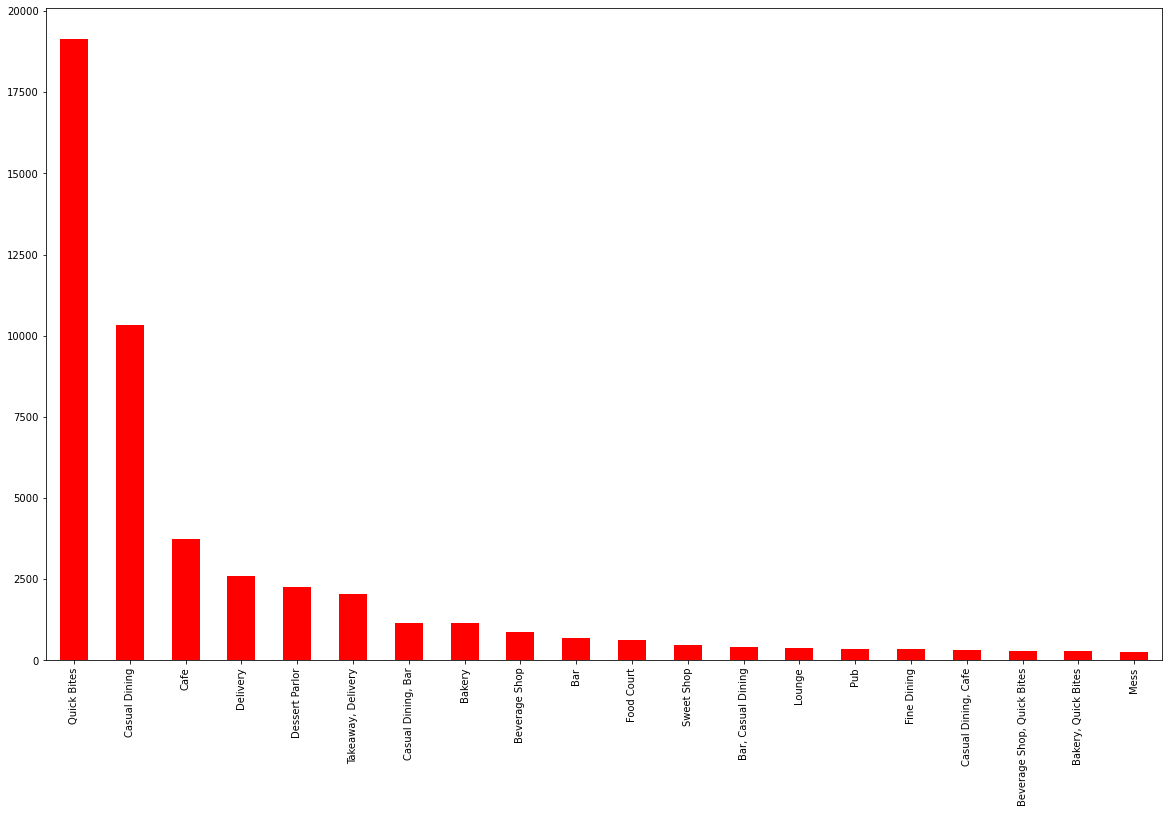

In [33]:
#checking how many types of restaurants we have
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))
df['rest_type'].value_counts().nlargest(20).plot.bar(color='red')


In [34]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [35]:
df['rest_type'].value_counts()

Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Bakery, Food Court                2
Dessert Parlor, Kiosk             2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 93, dtype: int64

In [36]:
#finding new feature using previous rest_types 
#checking all restaurants who servicing Quick Bites as well as Casual Dining
def mark(x):
    if x in ('Quick Bites','Casual Dining'):
        return 'Quick Bites + Casual Dining'
    else:
        return 'other'

In [37]:
df['Top_types']=df['rest_type'].apply(mark)

In [38]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)                    Top_types  
0          Buffet    Banashankari  Quick Bites + Casual Dining  
1          Buffet    Banashankari  Quick Bites + Casual Dining  
2          Buffet    Banashankari                        other  
3          Buffet    Banashankari  Quick Bites + Casual Dining  
4          Buffet    Banashankari  Quick Bites + Casual Dining

In [39]:
!pip install plotly

In [40]:
import plotly.express as px

In [41]:
#convert these value into array by using values 
df['Top_types'].value_counts().values

array([29462, 22255], dtype=int64)

In [42]:
values=df['Top_types'].value_counts().values

In [43]:
labels=df['Top_types'].value_counts().index

In [44]:
fig=px.pie(df,names=labels,values=values)
fig.show()

In [45]:
df.dtypes

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)    float64
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
Top_types                       object
dtype: object

In [46]:
#creating new dataframe for manipulating column name
rest=df.groupby('name').agg({'votes': 'sum','url': 'count','approx_cost(for two people)': 'mean','rate': 'mean'}).reset_index()
rest

name  votes  url  \
0                                     #FeelTheROLL     14    2   
1                                       #L-81 Cafe    432    9   
2                                    #Vibes Restro      0    3   
3                                          #refuel    111    3   
4                           'Brahmins' Thatte Idli      0    1   
...                                            ...    ...  ...   
8787                                       late100      0    5   
8788                                       nu.tree   1443    8   
8789  re:cess - Hilton Bangalore Embassy GolfLinks    438    3   
8790                                    repEAT Hub      0    2   
8791                                     sCoolMeal      0    5   

      approx_cost(for two people)      rate  
0                           200.0  3.400000  
1                           400.0  3.900000  
2                           700.0       NaN  
3                           400.0  3.700000  
4                           100.0       NaN  
...                           ...       ...  
8787                        200.0       NaN  
8788                        400.0  4.314286  
8789                       1200.0  4.100000  
8790                        200.0       NaN  
8791                        300.0       NaN  

[8792 rows x 5 columns]

In [47]:
#Manipulating coulmn name, Assign your own cloumn name 
# Assign columns name in the form of list
rest.columns = ['name', 'total_votes', 'total_unities', 'avg_approx_cost', 'mean_rating']
rest.head()

name  total_votes  total_unities  avg_approx_cost  \
0            #FeelTheROLL           14              2            200.0   
1              #L-81 Cafe          432              9            400.0   
2           #Vibes Restro            0              3            700.0   
3                 #refuel          111              3            400.0   
4  'Brahmins' Thatte Idli            0              1            100.0   

   mean_rating  
0          3.4  
1          3.9  
2          NaN  
3          3.7  
4          NaN

In [48]:
rest['votes_per_unity'] = rest['total_votes'] / rest['total_unities']
rest.head()

name  total_votes  total_unities  avg_approx_cost  \
0            #FeelTheROLL           14              2            200.0   
1              #L-81 Cafe          432              9            400.0   
2           #Vibes Restro            0              3            700.0   
3                 #refuel          111              3            400.0   
4  'Brahmins' Thatte Idli            0              1            100.0   

   mean_rating  votes_per_unity  
0          3.4              7.0  
1          3.9             48.0  
2          NaN              0.0  
3          3.7             37.0  
4          NaN              0.0

In [49]:
#creating new datset popular for performing operation
popular=rest.sort_values(by='total_unities', ascending=False)
popular

name  total_votes  total_unities  \
1320                   Cafe Coffee Day         3089             96   
5549                            Onesta       347520             85   
3788                         Just Bake         2898             73   
2446                 Empire Restaurant       229808             71   
2577                 Five Star Chicken         3134             70   
...                                ...          ...            ...   
1900                        Cool Break           11              1   
8076       The Shake Factory Originals            8              1   
5216        Nethravathi Military Hotel            0              1   
7426  Swadisht North Indian Restaurant           23              1   
5375                Night Punjabi Folk            0              1   

      avg_approx_cost  mean_rating  votes_per_unity  
1320       844.791667     3.147191        32.177083  
5549       600.000000     4.410588      4088.470588  
3788       400.000000     3.355882        39.698630  
2446       685.211268     3.916901      3236.732394  
2577       257.857143     3.425000        44.771429  
...               ...          ...              ...  
1900       150.000000     3.400000        11.000000  
8076       200.000000     3.300000         8.000000  
5216       200.000000          NaN         0.000000  
7426       200.000000     3.200000        23.000000  
5375       200.000000          NaN         0.000000  

[8792 rows x 6 columns]

In [50]:
popular['name'].nunique()

8792

In [51]:
popular.shape

(8792, 6)

Text(0.5, 1.0, 'Top 5 Less Voted Restaurants\n(with at least 1 vote)')

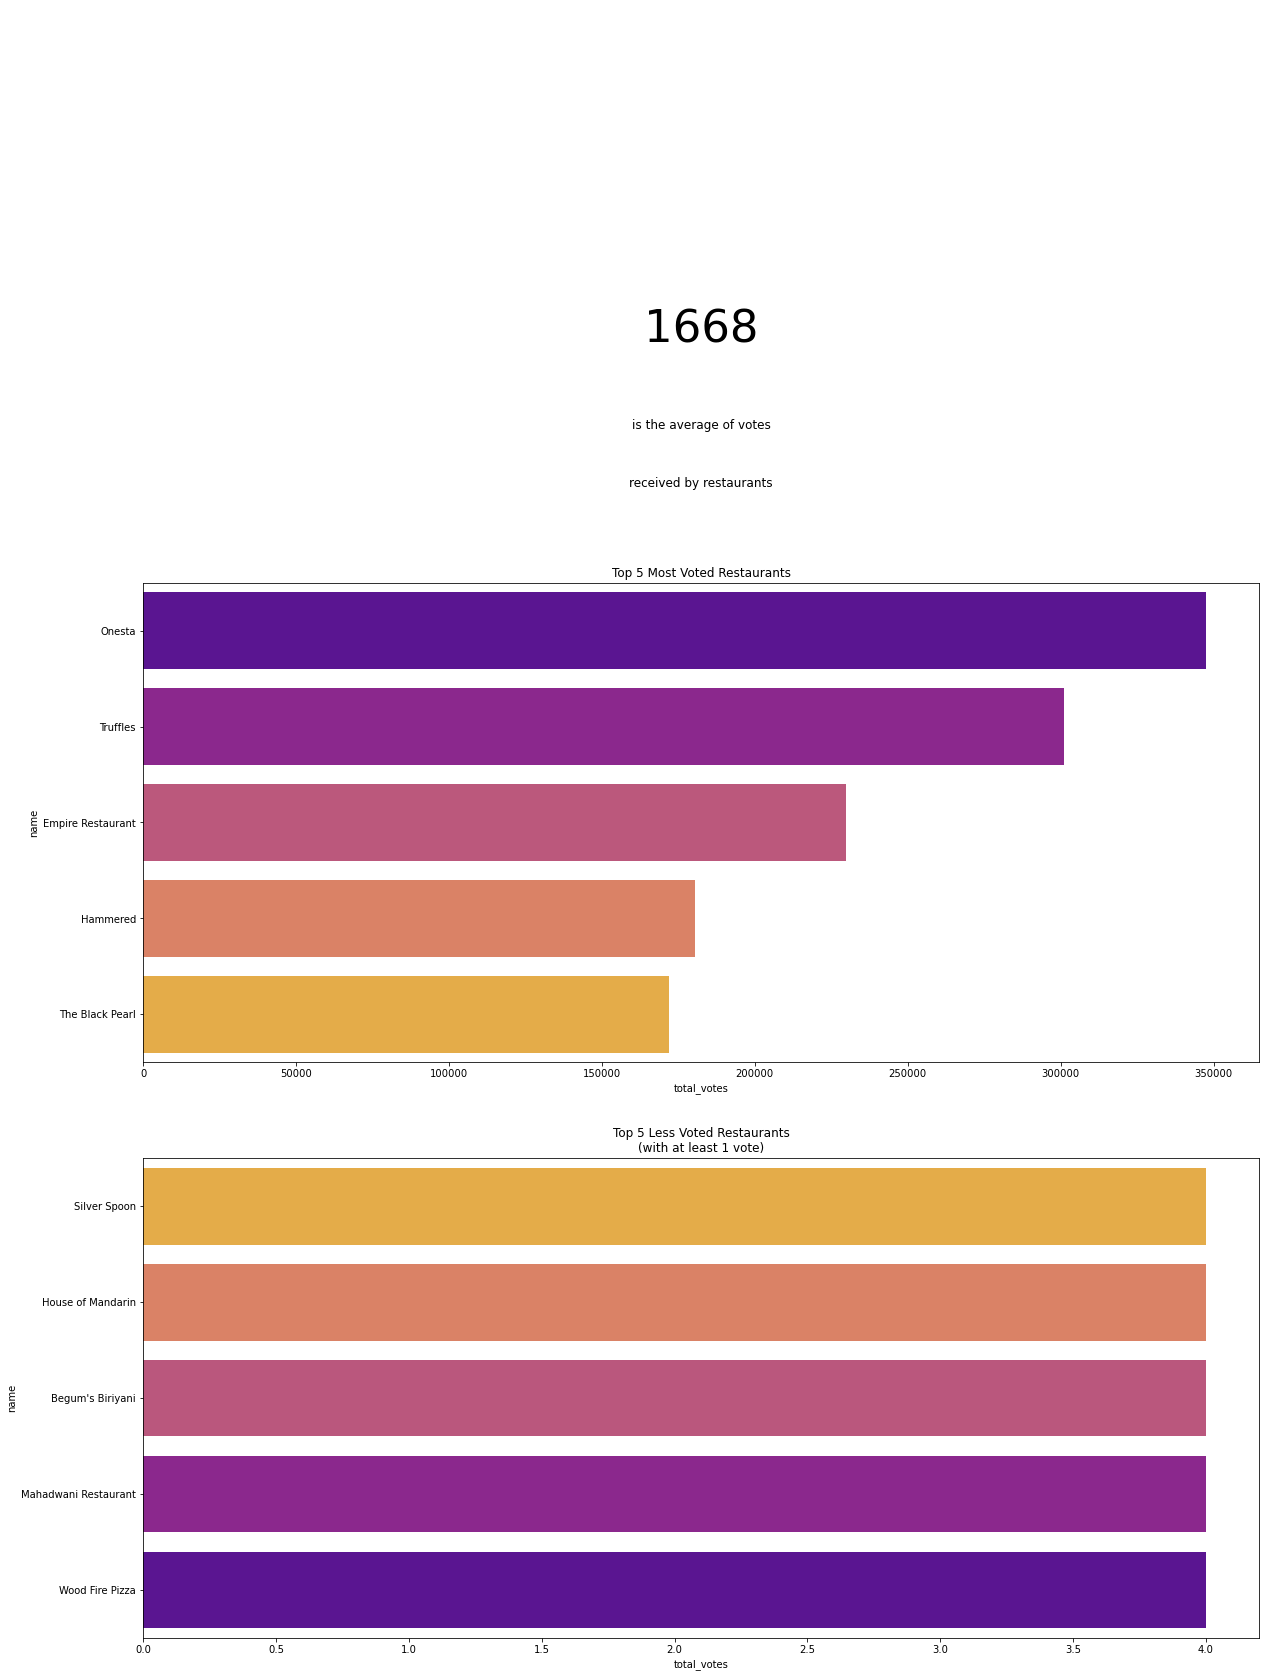

In [52]:
import seaborn as sns
# Creating a figure for restaurants overview analysis
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(20,30))

# Plot Pack 01 - Most popular restaurants (votes)

# Annotations
ax1.text(0.50, 0.30, int(popular['total_votes'].mean()), fontsize=45, ha='center')
ax1.text(0.50, 0.12, 'is the average of votes', fontsize=12, ha='center')
ax1.text(0.50, 0.00, 'received by restaurants', fontsize=12, ha='center')
ax1.axis('off')

sns.barplot(x='total_votes', y='name', data=popular.sort_values(by='total_votes', ascending=False)[0:5],ax=ax2, palette='plasma')
ax2.set_title('Top 5 Most Voted Restaurants', size=12)

sns.barplot(x='total_votes', y='name', data=popular.sort_values(by='total_votes', ascending=False).query('total_votes > 0').tail(),ax=ax3, palette='plasma_r')
ax3.set_title('Top 5 Less Voted Restaurants\n(with at least 1 vote)', size=12)


In [53]:
popular.columns

Index(['name', 'total_votes', 'total_unities', 'avg_approx_cost',
       'mean_rating', 'votes_per_unity'],
      dtype='object')

In [54]:
popular.head()

name  total_votes  total_unities  avg_approx_cost  \
1320    Cafe Coffee Day         3089             96       844.791667   
5549             Onesta       347520             85       600.000000   
3788          Just Bake         2898             73       400.000000   
2446  Empire Restaurant       229808             71       685.211268   
2577  Five Star Chicken         3134             70       257.857143   

      mean_rating  votes_per_unity  
1320     3.147191        32.177083  
5549     4.410588      4088.470588  
3788     3.355882        39.698630  
2446     3.916901      3236.732394  
2577     3.425000        44.771429

Text(0.5, 1.0, 'Top 5 Less Expensive Restaurants')

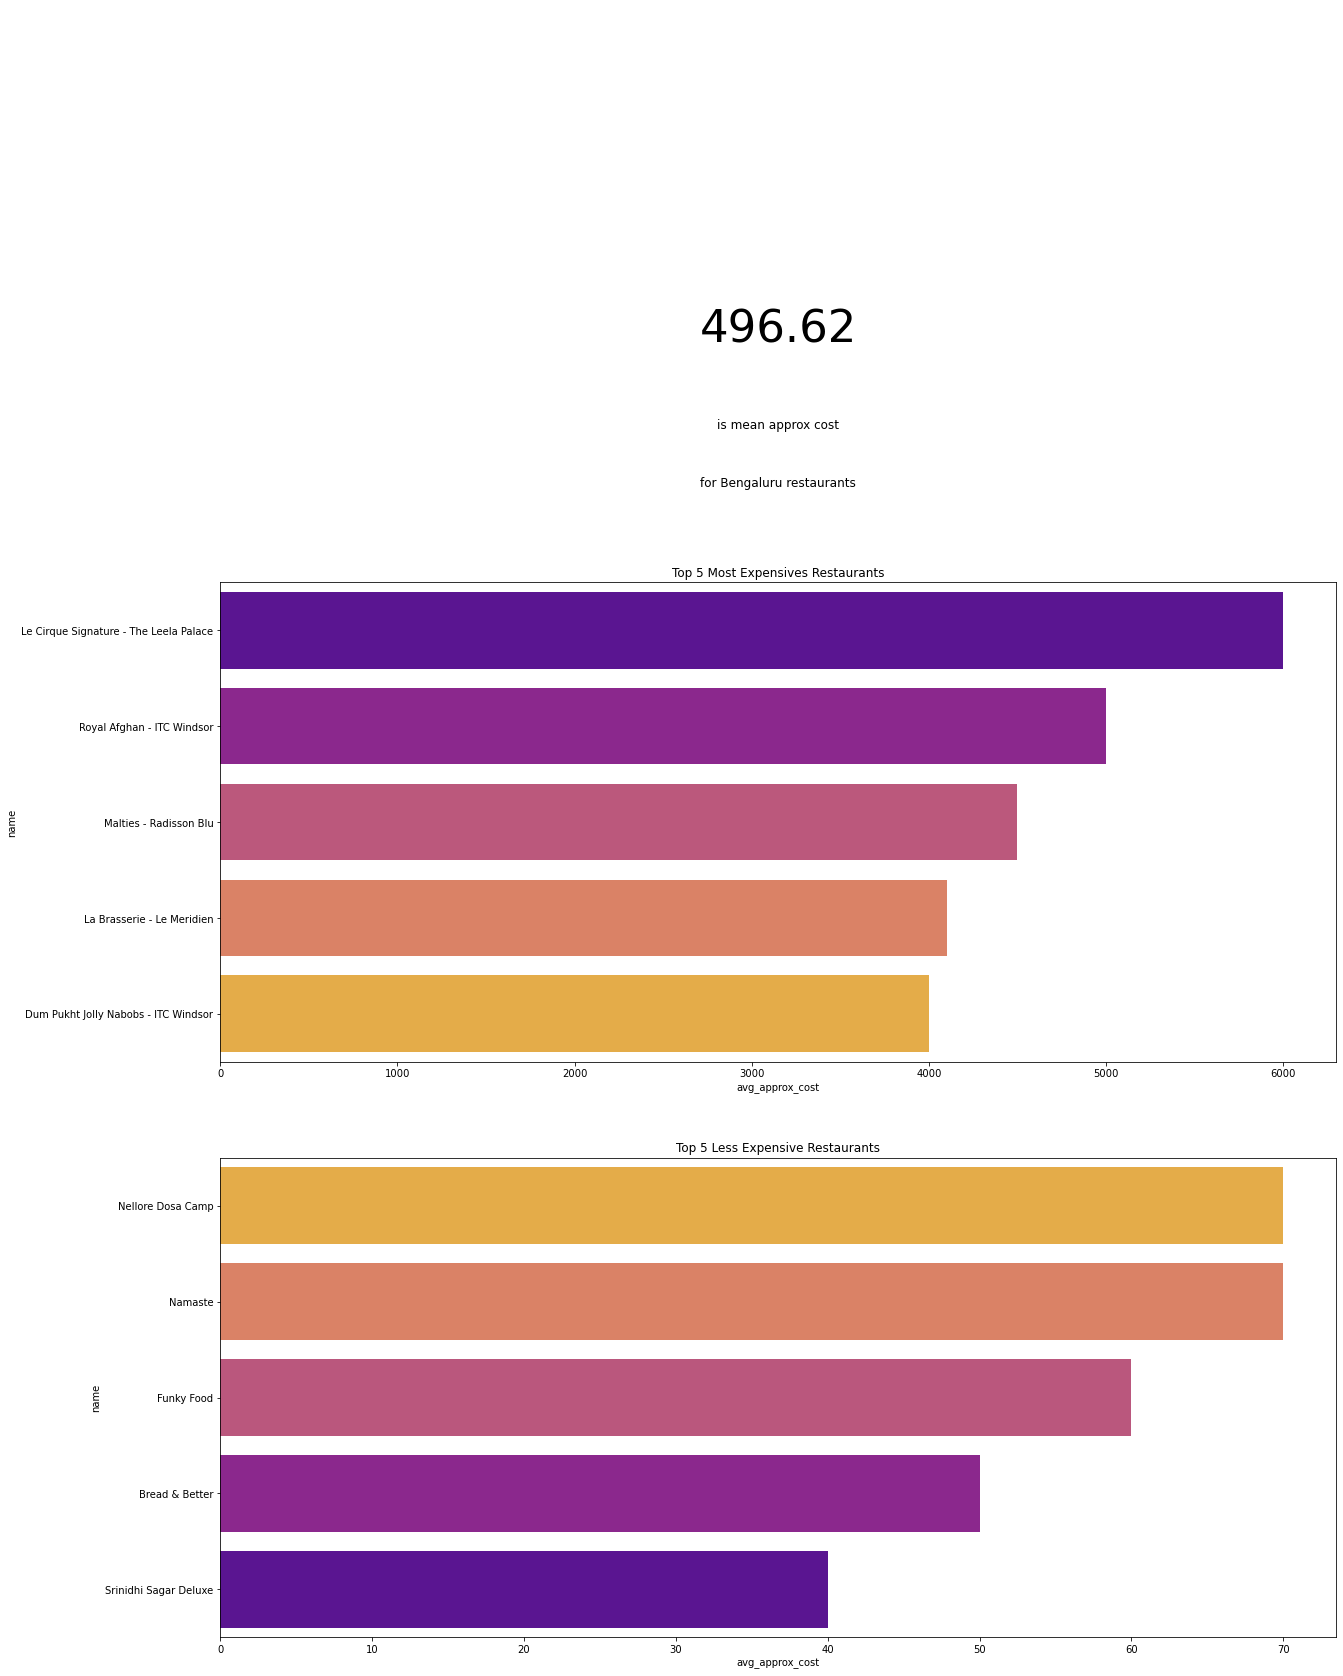

In [55]:
#create matrix of 3 by 1 in subplots no of 3 is row and columns is 
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(20,30))
# Annotations
import numpy as np
ax1.text(0.50, 0.30, np.round(popular['avg_approx_cost'].mean(), 2), fontsize=45, ha='center')
ax1.text(0.50, 0.12, 'is mean approx cost', fontsize=12, ha='center')
ax1.text(0.50, 0.00, 'for Bengaluru restaurants', fontsize=12, ha='center')
ax1.axis('off')

sns.barplot(x='avg_approx_cost', y='name', data=popular.sort_values(by='avg_approx_cost', ascending=False)[0:5],ax=ax2, palette='plasma')
ax2.set_title('Top 5 Most Expensives Restaurants', size=12)

sns.barplot(x='avg_approx_cost', y='name', data=popular.sort_values(by='avg_approx_cost', ascending=False).query('avg_approx_cost > 0').tail(),ax=ax3, palette='plasma_r')
ax3.set_title('Top 5 Less Expensive Restaurants', size=12)


In [56]:
df['book_table'].value_counts()

No     45268
Yes     6449
Name: book_table, dtype: int64

In [57]:
df['online_order'].value_counts()

Yes    30444
No     21273
Name: online_order, dtype: int64

# How many restaurants offer Book Table service? And how about Online Order service?

In [58]:
import plotly.graph_objs as go
from plotly.offline import iplot
x=df['book_table'].value_counts()
labels=['not book','book']

In [59]:
trace=go.Pie(labels=labels, values=x,
               hoverinfo='label+percent', textinfo='percent', 
               textfont=dict(size=25),
              pull=[0, 0, 0,0.2, 0]
               )
iplot([trace])

In [60]:
import plotly.express as px
x=df['online_order'].value_counts()
labels=['accepted','not accepted']

In [61]:
fig = px.pie(df, values=x, names=labels,title='Pie chart')
fig.show()

# Finding Best budget Restaurants in any location
##we will pass location and restaurant type as parameteres,function will return name of restaurants.¶

In [62]:
#use the filter for Best Budget Restaurants the given location
#below using functions
filter=(df['approx_cost(for two people)']<=400) & (df['location']=='BTM') & (df['rate']>4) & (df['rest_type']=='Quick Bites')
budget=df[filter]
budget.head()


url  \
934   https://www.zomato.com/bangalore/swadista-aaha...   
954   https://www.zomato.com/bangalore/litti-twist-b...   
1055  https://www.zomato.com/bangalore/the-shawarma-...   
1066  https://www.zomato.com/bangalore/gorbandh-btm?...   
1089  https://www.zomato.com/bangalore/yum-in-my-tum...   

                                                address               name  \
934      947, 16th Main Road, 2nd Stage, BTM, Bangalore     Swadista Aahar   
954   No 43, 7th Main Road, NS Palaya, BTM 2nd Stage...        Litti Twist   
1055  688, Opposite IWWA Party Hall, 7th Main, BTM, ...  The Shawarma Shop   
1066           725,16th Main, 2nd Stage, BTM, Bangalore           Gorbandh   
1089    766/A, 16th Main Road, BTM 2nd Stage, Bangalore      Yum In My Tum   

     online_order book_table  rate  votes                               phone  \
934           Yes         No   4.1    775  +91 9844006825\r\r\n+91 9844615361   
954           Yes         No   4.1    464                      +91 8884270523   
1055          Yes         No   4.1    381                      +91 9343665007   
1066          Yes         No   4.1     83                        080 49652562   
1089          Yes         No   4.1     92                      +91 9108084789   

     location    rest_type                                         dish_liked  \
934       BTM  Quick Bites  Panneer Butter Masala, Idli, Masala Dosa, Vada...   
954       BTM  Quick Bites  Litti, Liti Chokha, Lassi, Tea, Paratha, Thali...   
1055      BTM  Quick Bites  Rumali Roti, Rumali Shawarma, Burgers, Shawarm...   
1066      BTM  Quick Bites         Aloo Paratha, Samosa, Kachori, Poha, Chaat   
1089      BTM  Quick Bites  Momos, Manchow Soup, Pizza Sandwich, Spring Ro...   

                                              cuisines  \
934   South Indian, North Indian, Chinese, Street Food   
954                               North Indian, Bihari   
1055                                           Arabian   
1066                           Fast Food, North Indian   
1089     Chinese, Continental, Fast Food, Healthy Food   

      approx_cost(for two people)  \
934                         300.0   
954                         300.0   
1055                        250.0   
1066                        400.0   
1089                        300.0   

                                           reviews_list  \
934   [('Rated 3.0', "RATED\n  Ordered south Indian ...   
954   [('Rated 4.0', "RATED\n  It's a great outlet t...   
1055  [('Rated 3.0', "RATED\n  This place is good if...   
1066  [('Rated 4.0', "RATED\n  Have ordered from thi...   
1089  [('Rated 4.0', 'RATED\n  Found this place when...   

                                              menu_item listed_in(type)  \
934                                                  []        Delivery   
954                                                  []        Delivery   
1055  ['Rumali Shawarma', 'Rumali Jumbo Shawarma', '...        Delivery   
1066                                                 []        Delivery   
1089  ['Cheesy Fries', 'Momo Cheese Sandwich', 'Pizz...        Delivery   

        listed_in(city)                    Top_types  
934   Bannerghatta Road  Quick Bites + Casual Dining  
954   Bannerghatta Road  Quick Bites + Casual Dining  
1055  Bannerghatta Road  Quick Bites + Casual Dining  
1066  Bannerghatta Road  Quick Bites + Casual Dining  
1089  Bannerghatta Road  Quick Bites + Casual Dining

In [63]:
def return_budget(location,restaurant):
    budget=df[(df['approx_cost(for two people)']<=400) & (df['location']==location) & 
                     (df['rate']>4) & (df['rest_type']==restaurant)]
    return(budget['name'].unique())

In [64]:
return_budget('BTM',"Quick Bites")

array(['Swadista Aahar', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Chaatimes', "Muthashy's", 'Swad Punjab Da',
       "Domino's Pizza", 'Roti Wala', 'Andhra Kitchen'], dtype=object)

# geographical analysis

#I need Latitudes & longitudes for each of the place for geaographical Data analysis,so to fetch lat,lon of each place,use Geopy


In [65]:
locations=pd.DataFrame({"Name":df['location'].unique()})

In [66]:
locations['new_Name']='Bangalore '+locations['Name']

In [67]:
locations.head()

Name                      new_Name
0        Banashankari        Bangalore Banashankari
1        Basavanagudi        Bangalore Basavanagudi
2         Mysore Road         Bangalore Mysore Road
3           Jayanagar           Bangalore Jayanagar
4  Kumaraswamy Layout  Bangalore Kumaraswamy Layout

In [68]:
!pip install geopy

In [69]:
from geopy.geocoders import Nominatim

In [70]:
geolocator=Nominatim(user_agent="app")

In [71]:
data=df['name'][0]
data

'Jalsa'

In [72]:
data=geolocator.geocode(data)

In [73]:
data.latitude

43.5625752

In [74]:
data.longitude

-79.7107038

In [75]:
data

Location(Jalsa, Erin Centre Boulevard, Mississauga, Peel Region, Golden Horseshoe, Ontario, L5M 5H6, Canada, (43.5625752, -79.7107038, 0.0))

In [76]:
df.shape

(51717, 18)

In [77]:
df['location'].nunique()

93

In [78]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [79]:
#Creating a DataFrame above Locations
locations=pd.DataFrame({'Name':df['location'].unique()})
locations

Name
0         Banashankari
1         Basavanagudi
2          Mysore Road
3            Jayanagar
4   Kumaraswamy Layout
..                 ...
89      West Bangalore
90         Magadi Road
91           Yelahanka
92      Sahakara Nagar
93              Peenya

[94 rows x 1 columns]

In [80]:
lat=[]
lon=[]
geolocator=Nominatim(user_agent="app")
for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:    
        lat.append(location.latitude)
        lon.append(location.longitude)

In [81]:
locations['latitude']=lat
locations['longitude']=lon

In [82]:
locations.head()

Name   latitude  longitude
0        Banashankari  15.887678  75.704678
1        Basavanagudi  12.941726  77.575502
2         Mysore Road  12.387214  76.666963
3           Jayanagar  27.643927  83.052805
4  Kumaraswamy Layout  12.908149  77.555318

In [83]:
df['location'].value_counts()

BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
                         ... 
Yelahanka                   6
West Bangalore              6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

In [84]:
Rest_locations=df['location'].value_counts().reset_index()

In [85]:
Rest_locations

index  location
0                     BTM      5124
1                     HSR      2523
2   Koramangala 5th Block      2504
3                JP Nagar      2235
4              Whitefield      2144
..                    ...       ...
88              Yelahanka         6
89         West Bangalore         6
90                 Jakkur         3
91   Rajarajeshwari Nagar         2
92                 Peenya         1

[93 rows x 2 columns]

In [86]:
Rest_locations.columns=['Name','count']
Rest_locations

Name  count
0                     BTM   5124
1                     HSR   2523
2   Koramangala 5th Block   2504
3                JP Nagar   2235
4              Whitefield   2144
..                    ...    ...
88              Yelahanka      6
89         West Bangalore      6
90                 Jakkur      3
91   Rajarajeshwari Nagar      2
92                 Peenya      1

[93 rows x 2 columns]

In [87]:
locations.to_csv('zomato_locations.csv',index=False)

# We have found out latitude and longitude of each location listed in the dataset using geopy.
This is used to plot maps.¶

In [88]:
Rest_locations=pd.DataFrame(df['location'].value_counts().reset_index())

In [89]:
Rest_locations.columns=['Name','count']
Rest_locations.head()

Name  count
0                    BTM   5124
1                    HSR   2523
2  Koramangala 5th Block   2504
3               JP Nagar   2235
4             Whitefield   2144

# now combine both the dataframes

In [90]:
Restaurant_locations=Rest_locations.merge(locations,on='Name',how="left").dropna()
Restaurant_locations.head()

Name  count   latitude   longitude
0                    BTM   5124  45.954851 -112.496595
1                    HSR   2523  18.147500   41.538889
2  Koramangala 5th Block   2504  12.934377   77.628415
3               JP Nagar   2235  12.265594   76.646540
4             Whitefield   2144  44.373058  -71.611858

In [91]:
!pip install folium

In [92]:
import folium
from folium.plugins import HeatMap


In [93]:
basemap=folium.Map(location=[12.97,77.59])
basemap

# HeatMap Of Restaurants

In [94]:
HeatMap(data=Restaurant_locations[['latitude','longitude','count']]).add_to(basemap)

In [95]:
basemap

In [96]:
# wordcloud -- 100 words , is ,an,are remove

In [97]:
!pip install wordcloud

In [98]:
from wordcloud import WordCloud , STOPWORDS

In [99]:
data=df[df['rest_type']=='Quick Bites']
data.head()

url  \
3   https://www.zomato.com/bangalore/addhuri-udupi...   
31  https://www.zomato.com/bangalore/foodiction-1-...   
34  https://www.zomato.com/bangalore/faasos-banash...   
36  https://www.zomato.com/bangalore/fast-and-fres...   
39  https://www.zomato.com/bangalore/maruthi-davan...   

                                              address  \
3   1st Floor, Annakuteera, 3rd Stage, Banashankar...   
31  2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...   
34  80, BDA Complex, 2nd Stage, Banashankari, Bang...   
36  32, 7th Main Road, Dwaraka Nagar,Near PES Coll...   
39  556/A, Water Tank Road, 3rd Stage, Banashankar...   

                            name online_order book_table  rate  votes  \
3          Addhuri Udupi Bhojana           No         No   3.7     88   
31                    Foodiction          Yes         No   2.8    506   
34                        Faasos          Yes         No   4.2    415   
36                Fast And Fresh          Yes         No   2.8     91   
39  Maruthi Davangere Benne Dosa          Yes         No   4.0     17   

             phone      location    rest_type  \
3   +91 9620009302  Banashankari  Quick Bites   
31  +91 9916107070  Banashankari  Quick Bites   
34  +91 7700020020  Banashankari  Quick Bites   
36  +91 9742974232  Banashankari  Quick Bites   
39  +91 9019563485  Banashankari  Quick Bites   

                                           dish_liked  \
3                                         Masala Dosa   
31  Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...   
34  Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...   
36                                                NaN   
39                                                NaN   

                                    cuisines  approx_cost(for two people)  \
3                 South Indian, North Indian                        300.0   
31  North Indian, Fast Food, Chinese, Burger                        500.0   
34          North Indian, Biryani, Fast Food                        500.0   
36          North Indian, Chinese, Fast Food                        400.0   
39                              South Indian                        150.0   

                                         reviews_list  \
3   [('Rated 4.0', "RATED\n  Great food and proper...   
31  [('Rated 1.0', "RATED\n  Worst restaurant ever...   
34  [('Rated 3.0', 'RATED\n  Not worth for the mon...   
36  [('Rated 1.0', 'RATED\n  Half baked rice in a ...   
39  [('Rated 5.0', "RATED\n  This restaurant serve...   

                                            menu_item listed_in(type)  \
3                                                  []          Buffet   
31                                                 []        Delivery   
34  ['Chole Kulcha Meal', 'Upvas Aloo Paratha With...        Delivery   
36                                                 []        Delivery   
39  ['Benne Dosa', 'Benne Masala Dosa', 'Benne Kal...        Delivery   

   listed_in(city)                    Top_types  
3     Banashankari  Quick Bites + Casual Dining  
31    Banashankari  Quick Bites + Casual Dining  
34    Banashankari  Quick Bites + Casual Dining  
36    Banashankari  Quick Bites + Casual Dining  
39    Banashankari  Quick Bites + Casual Dining

In [100]:
data['dish_liked'][3].split()

['Masala', 'Dosa']

In [101]:
data['dish_liked'].isnull().sum()

13843

In [102]:
dishes=''
for word in data['dish_liked'].dropna():
    words=word.split()
    for i in range(len(words)):
        words[i]=words[i].lower()
    dishes=dishes+' '.join(words)+' '  
        

In [103]:
dishes

'masala dosa burgers, lassi, chicken grill, naan, momos, chicken burger, biryani rolls, veggie wrap, chocolate fantasy, rice bowls, chicken rice, paneer makhanwala, chicken tikka wrap dabeli, faluda, masala poori, sandwiches, tokri chaat, pav bhaji, dahipuri burgers, fries, hot chocolate pane pizza, lava cake, pasta, stuffed garlic bread, chocolava cake, tacos biryani paratha, pasta pasta, momos, rolls, chicken roll, chilli chicken, paneer roll, spaghetti grape juice, chicken grill, chicken tikka roll, shawarma roll, chicken shawarama, biryani combo, rolls vegetable biryani, ginger chicken, chicken biryani, donne biryani, chicken kebab, egg bhurji, dum biryani rolls, momos, fries, veggie roll, chicken kebab roll, paneer roll, cheese roll benne dosa, mirchi bajji, filter coffee, poha, tea, butter dosa, crispy dosa masala dosa panipuri, chaat, noodles, dahi bhalle rooftop ambience coffee, tea, kesari bath, open dosa, vada, idli, bread dosa masala dosa, tirupathi pongal, filter coffee, va

In [104]:
stopwords=set(STOPWORDS)

In [105]:
wordcloud= WordCloud(stopwords=stopwords,width=1500,height=1500).generate(dishes)

(-0.5, 1499.5, 1499.5, -0.5)

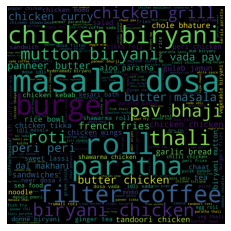

In [106]:
plt.imshow(wordcloud)
plt.axis('off')

In [107]:
data=df['reviews_list'][0]
data

'[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this plac

In [108]:
data=data.lower()

In [109]:
import re

In [110]:
data2=re.sub('[^a-zA-z]',' ',data)
data2

'[  rated        rated\\n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again       rated        rated\\n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout \\ncheers      rated        rated\\n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly

In [111]:
data3=re.sub('rated',' ',data2)
data3

'[            \\n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again                 \\n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout \\ncheers                \\n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly visited by vegetarians 

In [112]:
data4=re.sub('x',' ',data3)
data4

'[            \\n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again                 \\n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout \\ncheers                \\n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly visited by vegetarians 

In [113]:
data5=re.sub(' +',' ',data4)
data5

'[ \\n a beautiful place to dine in the interiors take you back to the mughal era the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again \\n i was here for dinner with my family on a weekday the restaurant was completely empty ambience is good with some good old hindi music seating arrangement are good too we ordered masala papad panner and baby corn starters lemon and corrionder soup butter roti olive and chilli paratha food was fresh and good service is good too good for family hangout \\ncheers \\n its a restaurant near to banashankari bda me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet on inquiring they said this place is mostly visited by vegetarians anyways we ordered ala carte items which took ages to come f

In [114]:
dataset=df[df['rest_type']=='Quick Bites']
dataset

url  \
3      https://www.zomato.com/bangalore/addhuri-udupi...   
31     https://www.zomato.com/bangalore/foodiction-1-...   
34     https://www.zomato.com/bangalore/faasos-banash...   
36     https://www.zomato.com/bangalore/fast-and-fres...   
39     https://www.zomato.com/bangalore/maruthi-davan...   
...                                                  ...   
51641  https://www.zomato.com/bangalore/andhra-spices...   
51642  https://www.zomato.com/bangalore/basaveshwara-...   
51643  https://www.zomato.com/bangalore/new-ambur-bir...   
51644  https://www.zomato.com/bangalore/punjabi-thadk...   
51645  https://www.zomato.com/bangalore/raapchick-bro...   

                                                 address  \
3      1st Floor, Annakuteera, 3rd Stage, Banashankar...   
31     2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...   
34     80, BDA Complex, 2nd Stage, Banashankari, Bang...   
36     32, 7th Main Road, Dwaraka Nagar,Near PES Coll...   
39     556/A, Water Tank Road, 3rd Stage, Banashankar...   
...                                                  ...   
51641  188, ITPL Main Road, Brookefields, Bangalore, ...   
51642  Nanjudeshwari complex, Oppsite Brookefield Mal...   
51643  AECS Layout, ITPL Main Road, Brookefield, Bang...   
51644  7/3, ASK Tower, Kundanahalli Gate, Next to Bat...   
51645  Opposite Brookefield Mall, Kundanhalli, Brooke...   

                               name online_order book_table  rate  votes  \
3             Addhuri Udupi Bhojana           No         No   3.7     88   
31                       Foodiction          Yes         No   2.8    506   
34                           Faasos          Yes         No   4.2    415   
36                   Fast And Fresh          Yes         No   2.8     91   
39     Maruthi Davangere Benne Dosa          Yes         No   4.0     17   
...                             ...          ...        ...   ...    ...   
51641                 Andhra Spices           No         No   3.2      4   
51642        Basaveshwara Khanavali           No         No   NaN      0   
51643             New Ambur Biryani           No         No   NaN      0   
51644                Punjabi Thadka           No         No   NaN      0   
51645                     Raapchick          Yes         No   3.6     49   

                                phone      location    rest_type  \
3                      +91 9620009302  Banashankari  Quick Bites   
31                     +91 9916107070  Banashankari  Quick Bites   
34                     +91 7700020020  Banashankari  Quick Bites   
36                     +91 9742974232  Banashankari  Quick Bites   
39                     +91 9019563485  Banashankari  Quick Bites   
...                               ...           ...          ...   
51641                             NaN   Brookefield  Quick Bites   
51642  +91 9740912864\n+91 7353747430   Brookefield  Quick Bites   
51643                  +91 9443087893   Brookefield  Quick Bites   
51644  +91 7338330336\n+91 9591568221   Brookefield  Quick Bites   
51645    080 41717785\n+91 9571153004   Brookefield  Quick Bites   

                                              dish_liked  \
3                                            Masala Dosa   
31     Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...   
34     Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...   
36                                                   NaN   
39                                                   NaN   
...                                                  ...   
51641                                                NaN   
51642                                                NaN   
51643                                                NaN   
51644                                                NaN   
51645                                            Burgers   

                                       cuisines  approx_cost(for two people)  \
3                    South Indian, North Indian                        300.0   


In [115]:
total_review=' '
for review in dataset['reviews_list']:
    review=review.lower()
    review=re.sub('[^a-zA-z]',' ',review)
    review=re.sub('rated',' ',review)
    review=re.sub('x',' ',review)
    re.sub(' +',' ',review)
    total_review=total_review + str(review)

In [116]:
wordcloud2= WordCloud(stopwords=stopwords,width=1500,height=1500).generate(total_review)

(-0.5, 1499.5, 1499.5, -0.5)

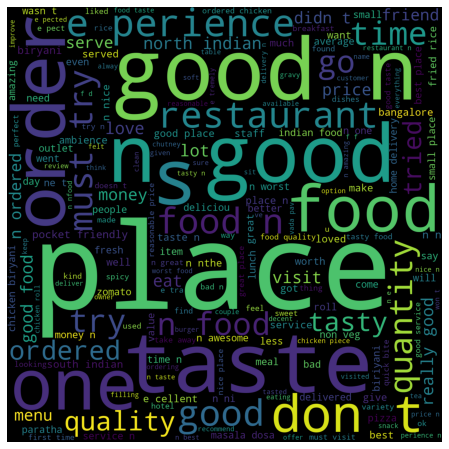

In [117]:
plt.figure(figsize = (8, 8)) 
plt.imshow(wordcloud2) 
plt.axis("off") 

# Predicting the Success of a Restaurant

In [118]:
#prepare your Data for Modeling purpose
## df -- 2
#New_rest rating-- =0
## train_Value_rest- >0 -- Ml model

In [119]:
# Splitting restaurants
### df['rated'] = df['rate'].apply(lambda x: 1 if x >= 0 else 0)
def assign(x):
    if x>0:
        return 1
    else:
        return 0
df['rated']=df['rate'].apply(assign)

In [120]:
df['rated'].unique()

array([1, 0], dtype=int64)

In [121]:
new_restaurants = df[df['rated'] == 0]
train_val_restaurants = df.query('rated == 1')


In [122]:
train_val_restaurants.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)                    Top_types  rated  
0          Buffet    Banashankari  Quick Bites + Casual Dining      1  
1          Buffet    Banashankari  Quick Bites + Casual Dining      1  
2          Buffet    Banashankari                        other      1  
3          Buffet    Banashankari  Quick Bites + Casual Dining      1  
4          Buffet    Banashankari  Quick Bites + Casual Dining      1

In [123]:
train_val_restaurants['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [124]:
# Defining a custom threshold for splitting restaurants into good and bad
#by Using custome Functions
threshold=3.75
def target(x):
    if x>=threshold:
        return 1
    else:
        return 0
train_val_restaurants['target'] = train_val_restaurants['rate'].apply(target)
train_val_restaurants.head()


url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)                    Top_types  rated  target  
0          Buffet    Banashankari  Quick Bites + Casual Dining      1       1  
1          Buffet    Banashankari  Quick Bites + Casual Dining      1       1  
2          Buffet    Banashankari                        other      1       1  
3          Buffet    Banashankari  Quick Bites + Casual Dining      1       0  
4          Buffet    Banashankari  Quick Bites + Casual Dining      1       1

In [125]:
threshold = 3.75
train_val_restaurants['target'] = train_val_restaurants['rate'].apply(lambda x: 1 if x >= threshold else 0)


In [126]:
train_val_restaurants.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)                    Top_types  rated  target  
0          Buffet    Banashankari  Quick Bites + Casual Dining      1       1  
1          Buffet    Banashankari  Quick Bites + Casual Dining      1       1  
2          Buffet    Banashankari                        other      1       1  
3          Buffet    Banashankari  Quick Bites + Casual Dining      1       0  
4          Buffet    Banashankari  Quick Bites + Casual Dining      1       1

In [127]:

x=train_val_restaurants['target'].value_counts()
labels=x.index
labels
#plt.pie(x,explode=[0.0,0.1],autopct='%1.1f%%')


Int64Index([0, 1], dtype='int64')

([<matplotlib.patches.Wedge at 0x24094562310>,
 [Text(-0.04879500100763322, 1.0989172161162393, '0'),
  Text(0.04879500100763285, -1.0989172161162393, '1')])

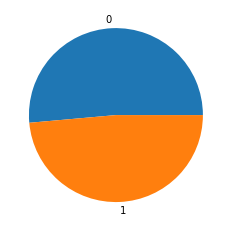

In [128]:
plt.pie(x,labels=labels)

# The next step is to prepare some features for training our classification model.
​


# Feature Extraction
After defining the target and splitting the data into train+val and test sets, let's define the features to be used on training. Here we will take a look at the raw data to select valuable features and apply some steps to create another ones.

The initial set of selected features inclue:

- online_order;
- book_table;
- location;
- rest_type;
- cuisines;
- listed_in(type);
- listed_in(city);
- approx_cost

In [129]:
train_val_restaurants.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'Top_types', 'rated', 'target'],
      dtype='object')

In [130]:
## train_val_restaurants['total_cuisines'] = train_val_restaurants['cuisines'].astype(str).apply(lambda x: len(x.split(',')))

def count(x):
    return len(x.split(','))

In [131]:
#### as it have some NAN value that why very first I have to convert into str  &  then apply a function
train_val_restaurants['total_cuisines']=train_val_restaurants['cuisines'].astype(str).apply(count)
train_val_restaurants['multiple_types']=train_val_restaurants['rest_type'].astype(str).apply(count)

In [132]:
#select imp Feature for next Model to train
imp_features=['online_order','book_table','location','rest_type','multiple_types','total_cuisines','listed_in(type)', 'listed_in(city)','approx_cost(for two people)','target']

In [133]:
data = train_val_restaurants[imp_features]
data.head()

online_order book_table      location            rest_type  multiple_types  \
0          Yes        Yes  Banashankari        Casual Dining               1   
1          Yes         No  Banashankari        Casual Dining               1   
2          Yes         No  Banashankari  Cafe, Casual Dining               2   
3           No         No  Banashankari          Quick Bites               1   
4           No         No  Basavanagudi        Casual Dining               1   

   total_cuisines listed_in(type) listed_in(city)  \
0               3          Buffet    Banashankari   
1               3          Buffet    Banashankari   
2               3          Buffet    Banashankari   
3               2          Buffet    Banashankari   
4               2          Buffet    Banashankari   

   approx_cost(for two people)  target  
0                        800.0       1  
1                        800.0       1  
2                        800.0       1  
3                        300.0       0  
4                        600.0       1

In [134]:
data.isnull().sum()

online_order                     0
book_table                       0
location                         0
rest_type                      149
multiple_types                   0
total_cuisines                   0
listed_in(type)                  0
listed_in(city)                  0
approx_cost(for two people)    247
target                           0
dtype: int64

In [135]:
data.dropna(how='any',inplace=True)

In [136]:
data.isnull().sum()

online_order                   0
book_table                     0
location                       0
rest_type                      0
multiple_types                 0
total_cuisines                 0
listed_in(type)                0
listed_in(city)                0
approx_cost(for two people)    0
target                         0
dtype: int64

In [137]:
data.dtypes

online_order                    object
book_table                      object
location                        object
rest_type                       object
multiple_types                   int64
total_cuisines                   int64
listed_in(type)                 object
listed_in(city)                 object
approx_cost(for two people)    float64
target                           int64
dtype: object

In [138]:
# Splitting features by data type checking above data-types ussing custom functions
cat_features=[]
num_features=[]
for col in data.columns:
    if data[col].dtype=='O':
        cat_features.append(col)
    elif data[col].dtype !='O': 
        num_features.append(col)
cat_features
num_features

['multiple_types', 'total_cuisines', 'approx_cost(for two people)', 'target']

In [139]:
# Splitting features by data type checking above data-types using list comprehension
cat_features= [col for col in data.columns if data[col].dtype == 'O']
num_features= [col for col in data.columns if data[col].dtype != 'O']

In [140]:
cat_features

['online_order',
 'book_table',
 'location',
 'rest_type',
 'listed_in(type)',
 'listed_in(city)']

In [141]:
num_features

['multiple_types', 'total_cuisines', 'approx_cost(for two people)', 'target']

In [142]:
for feature in cat_features:
    print('{} has total {} unique features'.format(feature, data[feature].nunique()))

online_order has total 2 unique features
book_table has total 2 unique features
location has total 92 unique features
rest_type has total 87 unique features
listed_in(type) has total 7 unique features
listed_in(city) has total 30 unique features


In [143]:
### ML-mathematics ---numbers
## catogirical(String) is converted  into --- Numbers using Feature Encoding
## one hot encoding
## online-order - 2 features

In [144]:
data['location'].nunique()

92

In [145]:
(data['location'].value_counts()/len(data))*100

BTM                      9.398851
Koramangala 5th Block    5.565651
HSR                      4.829057
Indiranagar              4.361416
JP Nagar                 4.143345
                           ...   
Yelahanka                0.009692
West Bangalore           0.007269
Rajarajeshwari Nagar     0.004846
Peenya                   0.002423
Nagarbhavi               0.002423
Name: location, Length: 92, dtype: float64

# on online_order,book_table & listed_in(type) we can apply Label Encoding

-But we will observe over here,we have many categories thus if we encode it using onne-hot encoding, it will consume more
memory in our system¶

In [146]:
data.shape

(41271, 10)

In [147]:
cols=['location','rest_type','listed_in(city)']
for col in cols:
    print('Total feature in {} are {}'.format(col,data[col].nunique()))
    print(data[col].value_counts()/(len(data))*100)
    print('\n')

Total feature in location are 92
BTM                      9.398851
Koramangala 5th Block    5.565651
HSR                      4.829057
Indiranagar              4.361416
JP Nagar                 4.143345
                           ...   
Yelahanka                0.009692
West Bangalore           0.007269
Rajarajeshwari Nagar     0.004846
Peenya                   0.002423
Nagarbhavi               0.002423
Name: location, Length: 92, dtype: float64


Total feature in rest_type are 87
Quick Bites                   33.643478
Casual Dining                 23.299654
Cafe                           8.163117
Dessert Parlor                 4.482566
Delivery                       4.048848
                                ...    
Dessert Parlor, Food Court     0.004846
Cafe, Food Court               0.004846
Food Court, Beverage Shop      0.004846
Bakery, Beverage Shop          0.002423
Quick Bites, Kiosk             0.002423
Name: rest_type, Length: 87, dtype: float64


Total feature in listed_in(c

In [148]:
percent=data['location'].value_counts()/len(data)*100
values=percent.values

In [149]:
len(values[values>0.4])

46

In [150]:
#### lets set Threshold value 0.4 ,

In [151]:
values=data['location'].value_counts()/len(data)*100
values

BTM                      9.398851
Koramangala 5th Block    5.565651
HSR                      4.829057
Indiranagar              4.361416
JP Nagar                 4.143345
                           ...   
Yelahanka                0.009692
West Bangalore           0.007269
Rajarajeshwari Nagar     0.004846
Peenya                   0.002423
Nagarbhavi               0.002423
Name: location, Length: 92, dtype: float64

In [152]:
threshold=0.4
imp=values[values>threshold]
imp

BTM                      9.398851
Koramangala 5th Block    5.565651
HSR                      4.829057
Indiranagar              4.361416
JP Nagar                 4.143345
Jayanagar                3.959197
Whitefield               3.808970
Marathahalli             3.416443
Bannerghatta Road        2.970609
Koramangala 7th Block    2.556274
Koramangala 6th Block    2.553851
Brigade Road             2.549005
Bellandur                2.415740
Sarjapur Road            2.069250
Koramangala 1st Block    2.064404
Ulsoor                   2.057135
Koramangala 4th Block    2.037750
Electronic City          2.020789
MG Road                  1.921446
Banashankari             1.802719
Kalyan Nagar             1.681568
Malleshwaram             1.553149
Residency Road           1.463497
Richmond Road            1.463497
Basavanagudi             1.441690
Frazer Town              1.371423
Church Street            1.322963
Brookefield              1.315694
New BEL Road             1.226042
Kammanahalli  

In [153]:
data['location']=np.where(data['location'].isin(imp.index),data['location'],'other')

##X_train['location']=X_train['location'].apply(lambda x:'other' if x not in imp.index else x)

In [154]:
data['location'].nunique()

47

In [155]:
values2=data['rest_type'].value_counts()/len(data)*100
values2

Quick Bites                   33.643478
Casual Dining                 23.299654
Cafe                           8.163117
Dessert Parlor                 4.482566
Delivery                       4.048848
                                ...    
Dessert Parlor, Food Court     0.004846
Cafe, Food Court               0.004846
Food Court, Beverage Shop      0.004846
Bakery, Beverage Shop          0.002423
Quick Bites, Kiosk             0.002423
Name: rest_type, Length: 87, dtype: float64

In [156]:
data['rest_type'].head(20)

0           Casual Dining
1           Casual Dining
2     Cafe, Casual Dining
3             Quick Bites
4           Casual Dining
5           Casual Dining
6           Casual Dining
7     Casual Dining, Cafe
8                    Cafe
9                    Cafe
10                   Cafe
11                   Cafe
12                   Cafe
13                   Cafe
14    Cafe, Casual Dining
15                   Cafe
16                   Cafe
17                   Cafe
18                   Cafe
19                   Cafe
Name: rest_type, dtype: object

In [157]:
len(values2[values2>0.3])

29

In [158]:
threshold=1.5
imp2=values2[values2>1.5]
imp2

Quick Bites           33.643478
Casual Dining         23.299654
Cafe                   8.163117
Dessert Parlor         4.482566
Delivery               4.048848
Takeaway, Delivery     3.099028
Casual Dining, Bar     2.645926
Bakery                 1.705798
Beverage Shop          1.555572
Bar                    1.550726
Name: rest_type, dtype: float64

In [159]:
len(imp2)

10

In [160]:
imp2.index

Index(['Quick Bites', 'Casual Dining', 'Cafe', 'Dessert Parlor', 'Delivery',
       'Takeaway, Delivery', 'Casual Dining, Bar', 'Bakery', 'Beverage Shop',
       'Bar'],
      dtype='object')

In [161]:
data['rest_type'].isin(imp2.index)

0         True
1         True
2        False
3         True
4         True
         ...  
51709     True
51711     True
51712     True
51715     True
51716    False
Name: rest_type, Length: 41271, dtype: bool

In [162]:
data['rest_type']=np.where(data['rest_type'].isin(imp2.index),data['rest_type'],'other')
##data['rest_type'].apply(lambda x: 'other' if x not in imp2.index else x)


In [163]:
data['rest_type'].head(20)

0     Casual Dining
1     Casual Dining
2             other
3       Quick Bites
4     Casual Dining
5     Casual Dining
6     Casual Dining
7             other
8              Cafe
9              Cafe
10             Cafe
11             Cafe
12             Cafe
13             Cafe
14            other
15             Cafe
16             Cafe
17             Cafe
18             Cafe
19             Cafe
Name: rest_type, dtype: object

# after apply feature reduction, we will observe less number of features

In [164]:
for feature in cat_features:
    print('{} has total {} unique features'.format(feature, data[feature].nunique()))

online_order has total 2 unique features
book_table has total 2 unique features
location has total 47 unique features
rest_type has total 11 unique features
listed_in(type) has total 7 unique features
listed_in(city) has total 30 unique features


In [165]:
import pandas as pd
data_cat = data[cat_features]
for col in cat_features:
    col_encoded = pd.get_dummies(data_cat[col],prefix=col,drop_first=True)
    data_cat=pd.concat([data_cat,col_encoded],axis=1)
    data_cat.drop(col, axis=1, inplace=True)

In [166]:
data_cat.shape

(41271, 93)

In [167]:
data_cat.head(10)

online_order_Yes  book_table_Yes  location_Banashankari  \
0                 1               1                      1   
1                 1               0                      1   
2                 1               0                      1   
3                 0               0                      1   
4                 0               0                      0   
5                 1               0                      0   
6                 0               0                      0   
7                 1               1                      1   
8                 1               0                      1   
9                 1               0                      1   

   location_Banaswadi  location_Bannerghatta Road  location_Basavanagudi  \
0                   0                           0                      0   
1                   0                           0                      0   
2                   0                           0                      0   
3                   0                           0                      0   
4                   0                           0                      1   
5                   0                           0                      1   
6                   0                           0                      0   
7                   0                           0                      0   
8                   0                           0                      0   
9                   0                           0                      0   

   location_Bellandur  location_Brigade Road  location_Brookefield  \
0                   0                      0                     0   
1                   0                      0                     0   
2                   0                      0                     0   
3                   0                      0                     0   
4                   0                      0                     0   
5                   0                      0                     0   
6                   0                      0                     0   
7                   0                      0                     0   
8                   0                      0                     0   
9                   0                      0                     0   

   location_Church Street  ...  listed_in(city)_Lavelle Road  \
0                       0  ...                             0   
1                       0  ...                             0   
2                       0  ...                             0   
3                       0  ...                             0   
4                       0  ...                             0   
5                       0  ...                             0   
6                       0  ...                             0   
7                       0  ...                             0   
8                       0  ...                             0   
9                       0  ...                             0   

   listed_in(city)_MG Road  listed_in(city)_Malleshwaram  \
0                        0                             0   
1                        0                             0   
2                        0                             0   
3                        0                             0   
4                        0                             0   
5                        0                             0   
6                        0                             0   
7                        0                             0   
8                        0                             0   
9                        0                             0   

   listed_in(city)_Marathahalli  listed_in(city)_New BEL Road  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                    

In [168]:
data.head()

online_order book_table      location      rest_type  multiple_types  \
0          Yes        Yes  Banashankari  Casual Dining               1   
1          Yes         No  Banashankari  Casual Dining               1   
2          Yes         No  Banashankari          other               2   
3           No         No  Banashankari    Quick Bites               1   
4           No         No  Basavanagudi  Casual Dining               1   

   total_cuisines listed_in(type) listed_in(city)  \
0               3          Buffet    Banashankari   
1               3          Buffet    Banashankari   
2               3          Buffet    Banashankari   
3               2          Buffet    Banashankari   
4               2          Buffet    Banashankari   

   approx_cost(for two people)  target  
0                        800.0       1  
1                        800.0       1  
2                        800.0       1  
3                        300.0       0  
4                        600.0       1

In [169]:
#concat the Data

In [170]:
data_final=pd.concat([data.loc[:,['multiple_types','total_cuisines','approx_cost(for two people)','target']],data_cat],axis=1)

In [171]:
data_final.shape

(41271, 97)

In [172]:
# Splitting the data
X = data_final.drop('target', axis=1)
y = data_final['target'].values

In [176]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

In [177]:
X_train.shape

(33016, 96)

In [178]:
# Import the random forest model.
from sklearn.ensemble import RandomForestClassifier


In [179]:
# Initialize the model with some parameters.
model = RandomForestClassifier(n_estimators=100, min_samples_leaf=10, random_state=1)


In [180]:
# Fit the model to the data.
model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=10, random_state=1)

In [181]:
# Make predictions.
predictions = model.predict(X_test)

# Compute the error.
from sklearn.metrics import confusion_matrix
confusion_matrix(predictions, y_test)

array([[3556, 1283],
       [ 696, 2720]], dtype=int64)

In [182]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions,y_test)


0.7602665051483949

In [183]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [184]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [185]:
#fit naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
#from sklearn.ensemble import XGBClassifier
#from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [186]:
### classifier models
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('Naive Bayes',GaussianNB()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))

In [187]:
for name,model in models:
    print(name)
    print(models)

LogisticRegression
[('LogisticRegression', LogisticRegression()), ('Naive Bayes', GaussianNB()), ('RandomForest', RandomForestClassifier()), ('Decision Tree', DecisionTreeClassifier()), ('KNN', KNeighborsClassifier())]
Naive Bayes
[('LogisticRegression', LogisticRegression()), ('Naive Bayes', GaussianNB()), ('RandomForest', RandomForestClassifier()), ('Decision Tree', DecisionTreeClassifier()), ('KNN', KNeighborsClassifier())]
RandomForest
[('LogisticRegression', LogisticRegression()), ('Naive Bayes', GaussianNB()), ('RandomForest', RandomForestClassifier()), ('Decision Tree', DecisionTreeClassifier()), ('KNN', KNeighborsClassifier())]
Decision Tree
[('LogisticRegression', LogisticRegression()), ('Naive Bayes', GaussianNB()), ('RandomForest', RandomForestClassifier()), ('Decision Tree', DecisionTreeClassifier()), ('KNN', KNeighborsClassifier())]
KNN
[('LogisticRegression', LogisticRegression()), ('Naive Bayes', GaussianNB()), ('RandomForest', RandomForestClassifier()), ('Decision Tree'

In [188]:
# Make predictions on validation dataset

for name, model in models:
    print(name)
    model.fit(X_train, y_train)
    
    # Make predictions.
    predictions = model.predict(X_test)

    # Compute the error.
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(predictions, y_test))

    from sklearn.metrics import accuracy_score
    print(accuracy_score(predictions,y_test))
    print('\n')

LogisticRegression
[[3475 1526]
 [ 777 2477]]
0.7210175651120533


Naive Bayes
[[3040 1460]
 [1212 2543]]
0.6763173834039976


RandomForest
[[3513  942]
 [ 739 3061]]
0.7963658388855239


Decision Tree
[[3654  812]
 [ 598 3191]]
0.8291944276196245


KNN
[[3623 1006]
 [ 629 2997]]
0.8019382192610539


